In [1]:
from pandas import read_csv
import pandas
import matplotlib.pyplot as plt

df = read_csv('../handson-ml2/prediction_credit.csv', index_col=0)

In [2]:
df

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs,NumberOfTotalTime,MonthlyDebt,MonthlyBalance,RatioIncomeDependents,SeriousDlqin2yrs.1,confidence,0 probability,1 probability
field1,,,,,,,,,,,,,,,,,,,
5,0.907239,49,1,0.024926,63588,7,0,1,0,0,0,1,1584.975094,62003.024906,inf,0,0.76236,0.81258,0.18742
20,0.602794,25,0,0.065868,333,2,0,0,0,0,0,0,21.934132,311.065868,inf,0,0.92612,0.94428,0.05572
27,0.052436,58,0,0.097672,8333,22,0,1,0,0,0,0,813.902326,7519.097674,inf,0,0.98830,0.99221,0.00779
28,0.034421,69,0,0.042383,2500,17,0,0,0,1,0,0,105.957617,2394.042382,2.500000e+03,0,0.98816,0.99275,0.00725
31,0.704074,28,1,0.155201,4200,8,0,0,0,0,0,1,651.844801,3548.155199,inf,0,0.85648,0.88159,0.11841
50,0.000080,70,0,0.256340,6900,21,1,1,0,0,0,1,1768.743661,5131.256339,inf,0,0.85498,0.87986,0.12014
51,0.818978,73,0,3095.000000,0,9,0,1,1,0,0,1,0.000000,0.000000,NaN,0,0.72882,0.76118,0.23882
61,0.651603,58,0,0.241136,7783,11,0,1,0,0,0,0,1876.758865,5906.241135,inf,0,0.95869,0.96899,0.03101
74,0.059669,31,0,3162.000000,0,11,0,2,0,1,0,0,0.000000,0.000000,0.000000e+00,0,0.97946,0.98488,0.01512


In [3]:
#Create the error column
def function_matrix(row):
    if row['SeriousDlqin2yrs'] == row['SeriousDlqin2yrs.1'] and row['SeriousDlqin2yrs'] == 0 :
        val = "TN"
    elif row['SeriousDlqin2yrs'] == row['SeriousDlqin2yrs.1'] and row['SeriousDlqin2yrs'] == 1 :
        val = "TP"
    elif row['SeriousDlqin2yrs'] > row['SeriousDlqin2yrs.1']:
        val = "FN"
    else:
        val = "FP"
    return val

df['Error'] = df.apply(function_matrix, axis=1)


In [4]:
df

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs,NumberOfTotalTime,MonthlyDebt,MonthlyBalance,RatioIncomeDependents,SeriousDlqin2yrs.1,confidence,0 probability,1 probability,Error
field1,,,,,,,,,,,,,,,,,,,,
5,0.907239,49,1,0.024926,63588,7,0,1,0,0,0,1,1584.975094,62003.024906,inf,0,0.76236,0.81258,0.18742,TN
20,0.602794,25,0,0.065868,333,2,0,0,0,0,0,0,21.934132,311.065868,inf,0,0.92612,0.94428,0.05572,TN
27,0.052436,58,0,0.097672,8333,22,0,1,0,0,0,0,813.902326,7519.097674,inf,0,0.98830,0.99221,0.00779,TN
28,0.034421,69,0,0.042383,2500,17,0,0,0,1,0,0,105.957617,2394.042382,2.500000e+03,0,0.98816,0.99275,0.00725,TN
31,0.704074,28,1,0.155201,4200,8,0,0,0,0,0,1,651.844801,3548.155199,inf,0,0.85648,0.88159,0.11841,TN
50,0.000080,70,0,0.256340,6900,21,1,1,0,0,0,1,1768.743661,5131.256339,inf,0,0.85498,0.87986,0.12014,TN
51,0.818978,73,0,3095.000000,0,9,0,1,1,0,0,1,0.000000,0.000000,NaN,0,0.72882,0.76118,0.23882,TN
61,0.651603,58,0,0.241136,7783,11,0,1,0,0,0,0,1876.758865,5906.241135,inf,0,0.95869,0.96899,0.03101,TN
74,0.059669,31,0,3162.000000,0,11,0,2,0,1,0,0,0.000000,0.000000,0.000000e+00,0,0.97946,0.98488,0.01512,TN


In [5]:
#Create a function to show the confusion matrix
tn =0
tp =0
fn =0
fp =0

for value in df['Error']:
    if value == 'TN':
        tn +=1
    elif value == 'FN':
        fn +=1
    elif value == 'TP':
        tp +=1
    elif value == 'FP':
        fp +=1

print('TN=',tn)
print('FN=',fn)
print('TP=',tp)
print('FP=',fp)
#df.groupby(['Error']).Error.coun()


TN= 27772
FN= 1700
TP= 315
FP= 213


In [6]:
#Create an abs column/Desc Order the column/Create and export the first 100 errors
df['absolute_error'] = (df['1 probability']-df['SeriousDlqin2yrs.1']).abs()
desc_order = df.sort_values(by='absolute_error', ascending=False).head(100)
desc_order.to_csv('100_credit_errors.csv')

In [7]:
df

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,...,NumberOfTotalTime,MonthlyDebt,MonthlyBalance,RatioIncomeDependents,SeriousDlqin2yrs.1,confidence,0 probability,1 probability,Error,absolute_error
field1,,,,,,,,,,,,,,,,,,,,,
5,0.907239,49,1,0.024926,63588,7,0,1,0,0,...,1,1584.975094,62003.024906,inf,0,0.76236,0.81258,0.18742,TN,0.18742
20,0.602794,25,0,0.065868,333,2,0,0,0,0,...,0,21.934132,311.065868,inf,0,0.92612,0.94428,0.05572,TN,0.05572
27,0.052436,58,0,0.097672,8333,22,0,1,0,0,...,0,813.902326,7519.097674,inf,0,0.98830,0.99221,0.00779,TN,0.00779
28,0.034421,69,0,0.042383,2500,17,0,0,0,1,...,0,105.957617,2394.042382,2.500000e+03,0,0.98816,0.99275,0.00725,TN,0.00725
31,0.704074,28,1,0.155201,4200,8,0,0,0,0,...,1,651.844801,3548.155199,inf,0,0.85648,0.88159,0.11841,TN,0.11841
50,0.000080,70,0,0.256340,6900,21,1,1,0,0,...,1,1768.743661,5131.256339,inf,0,0.85498,0.87986,0.12014,TN,0.12014
51,0.818978,73,0,3095.000000,0,9,0,1,1,0,...,1,0.000000,0.000000,NaN,0,0.72882,0.76118,0.23882,TN,0.23882
61,0.651603,58,0,0.241136,7783,11,0,1,0,0,...,0,1876.758865,5906.241135,inf,0,0.95869,0.96899,0.03101,TN,0.03101
74,0.059669,31,0,3162.000000,0,11,0,2,0,1,...,0,0.000000,0.000000,0.000000e+00,0,0.97946,0.98488,0.01512,TN,0.01512


The maximum gain is 10011500 with a threshold 0.281


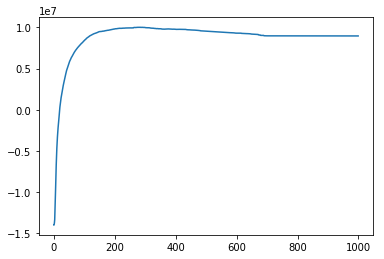

In [9]:
#Create a function to calculate the gain/lost and create a table
def cost_threshold(threshold):
    prediction_threshold = df['1 probability'] > threshold

    #~ = "not" pour les tableaux / & = "and" pour les tableaux / | = "or" pour les tableaux

    P_pred = prediction_threshold
    N_pred = ~prediction_threshold

    P_real = (df['SeriousDlqin2yrs'] == 1)
    N_real = (df['SeriousDlqin2yrs'] == 0)

    TP = len(df.loc[P_pred & P_real])
    TN = len(df.loc[N_pred & N_real])
    FP = len(df.loc[P_pred & N_real])
    FN = len(df.loc[N_pred & P_real])

    TP_cost = 0
    FN_cost = -2500
    FP_cost = -500
    TN_cost = 500

    cost = (TP * TP_cost)
    cost += TN * TN_cost
    cost += FP * FP_cost
    cost += FN * FN_cost

    return cost


table = [cost_threshold(n/1000) for n in range(0,1000)]
plt.plot(table)

max_val = max(table)
max_threshold = table.index(max_val)/1000
print(f'The maximum gain is {max_val} with a threshold {max_threshold}')
